import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loading dataset

In [2]:
data = pd.read_csv('fraud_detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


basic eda

In [3]:
data.shape
data.columns
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

outlier detection and handling thorugh capping method

In [6]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

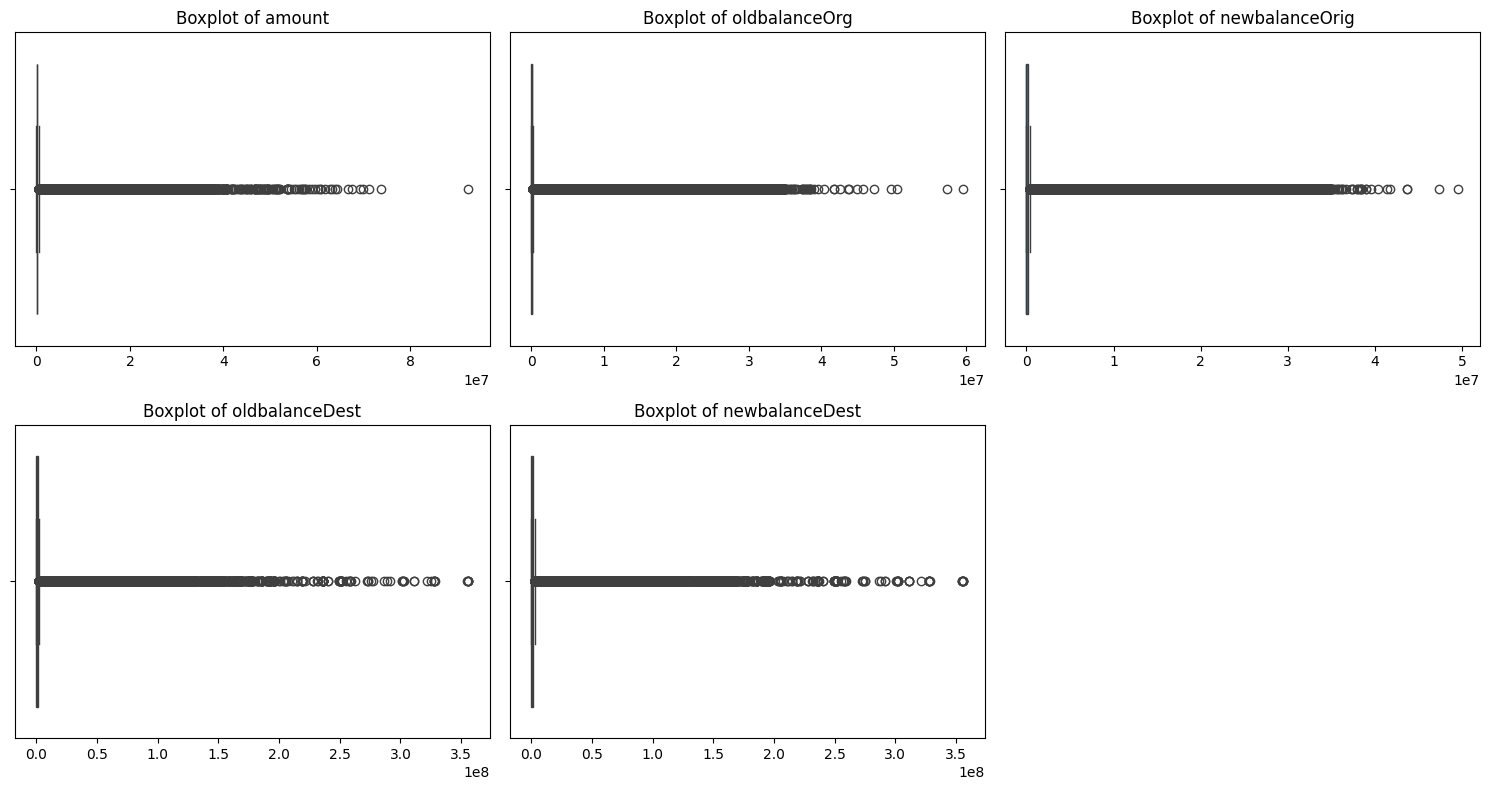

In [7]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

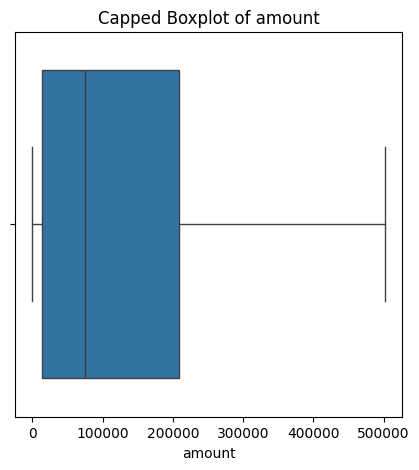

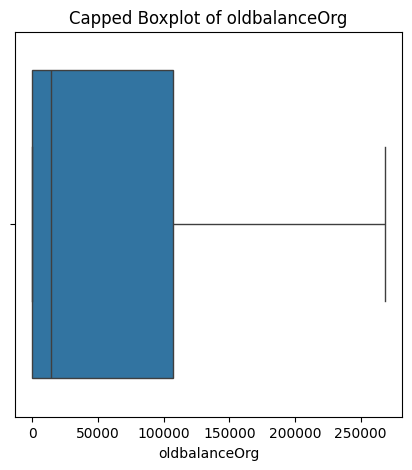

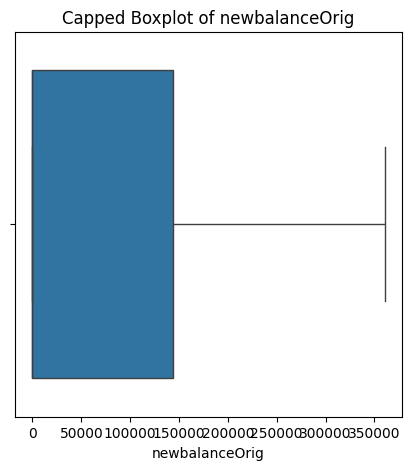

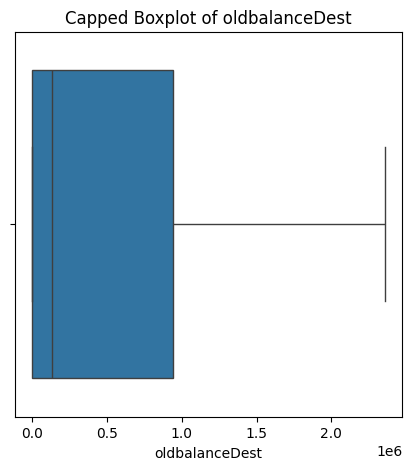

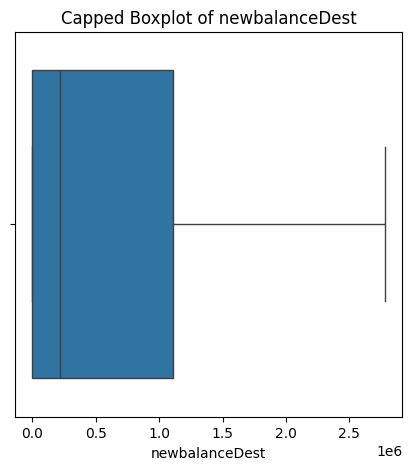

In [8]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

for col in numeric_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Capped Boxplot of {col}')
    plt.show()

outliers removed

Univariate analysis

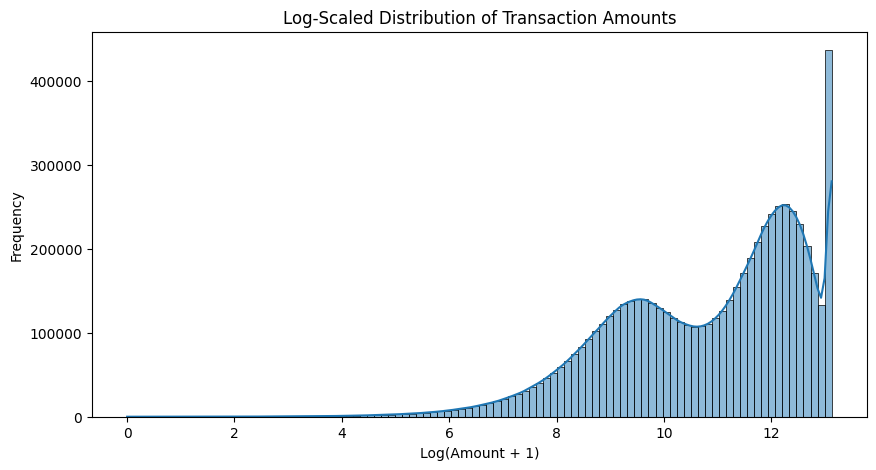

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(data['amount']), bins=100, kde=True)
plt.title('Log-Scaled Distribution of Transaction Amounts')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

most of amount lie between 9 to 13

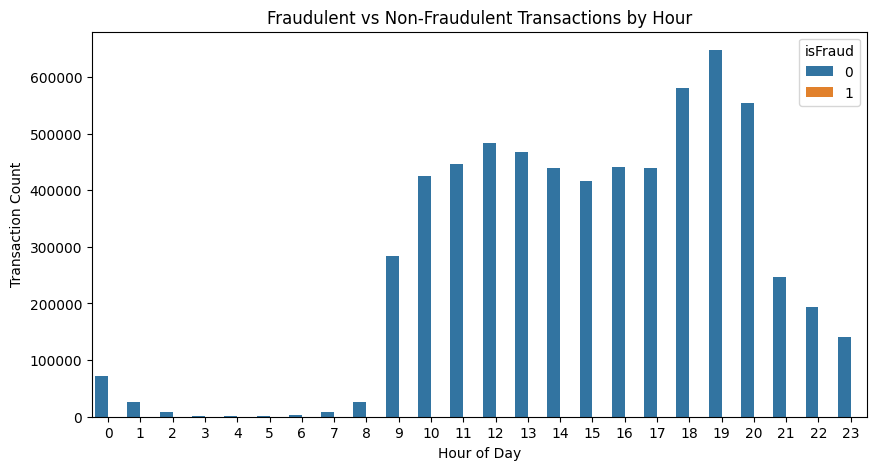

In [10]:
data['hour'] = data['step'] % 24
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', hue='isFraud', data=data)
plt.title('Fraudulent vs Non-Fraudulent Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.legend(title='isFraud')
plt.show()

In [11]:
##most of transaction occur at evening

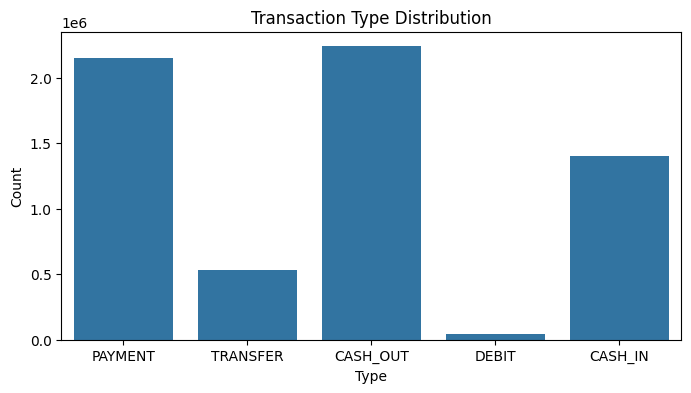

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=data)
plt.title('Transaction Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [12]:
## highest transaction type is payment and cash out

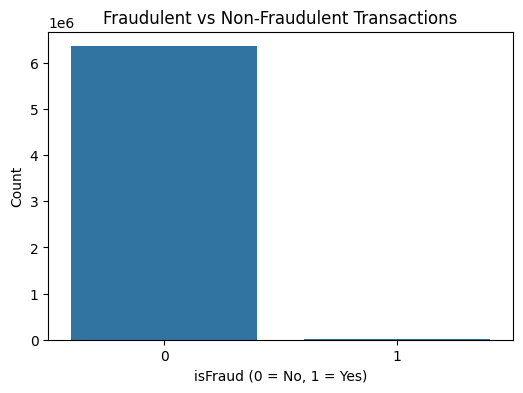

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('isFraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [14]:
## most of the transactions are legit and it shows data is highly imbalanced

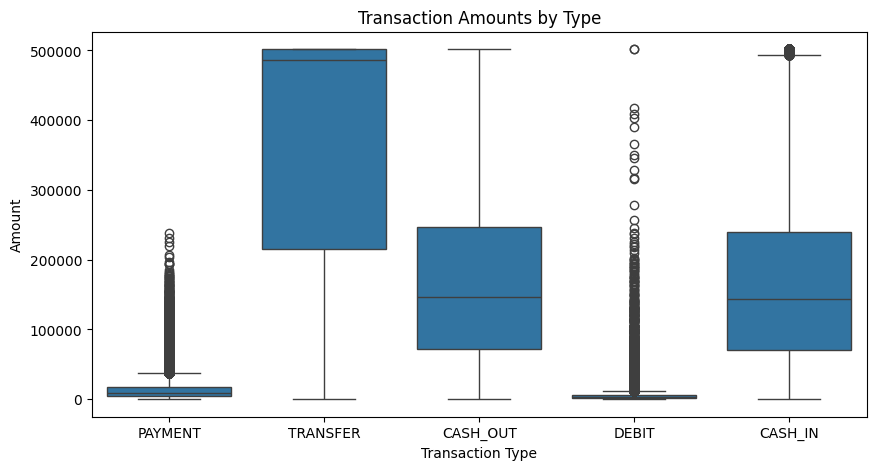

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='amount', data=data)
plt.title('Transaction Amounts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

In [19]:
## median tranaction amount is highest for transfer transation type

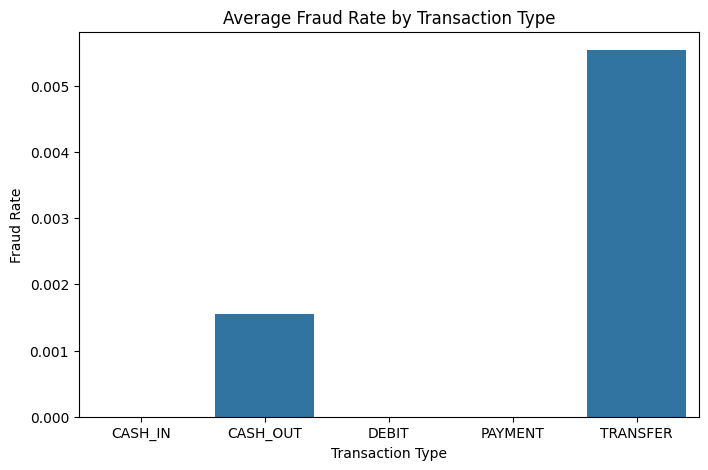

In [20]:
fraud_rate = data.groupby('type')['isFraud'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='type', y='isFraud', data=fraud_rate)
plt.title('Average Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.show()

In [21]:
## highest fraud rates happen during transfers and cash_out

<Axes: >

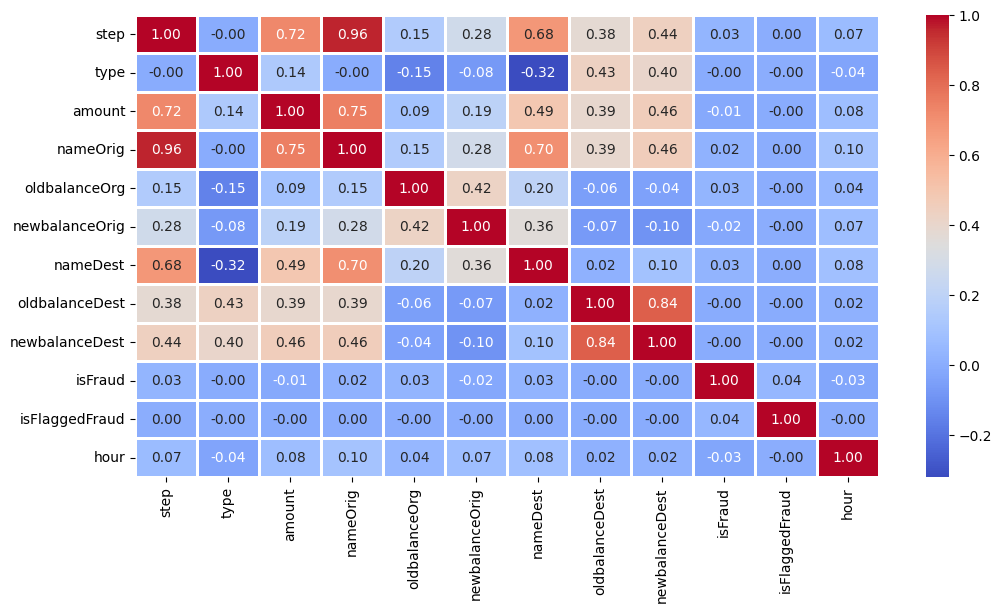

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
cmap='coolwarm',
fmt='.2f',
linewidths=2,
annot=True)

In [23]:
###strong positive correlation
## nameorig and step(0.81)
##nameorig and amount(0.88)
##nameorig and hour(0.87)
###negative correlated
##namedest and type(-0.26)

In [23]:
#error_org:This measures how much money disappeared or doesn’t match the expected change in the sender’s account after a transaction.
#In a legitimate transaction:
#oldbalanceOrg - amount = newbalanceOrig
################################
# error_dest:This checks whether the receiver’s account balance increased by the expected amount.
#Ideally:newbalanceDest - oldbalanceDest = amount
############################
#balance_diff_org:It’s the net change in the sender’s balance after transaction.
#Interpretation:
#Normally, should be negative (money leaving account).
#Fraudulent transactions might show:
#No decrease (unchanged balance)
#Even an increase (fake or reversed entries)
##########################
#balance_diff_dest:Measures how much the destination account’s balance increased after the transaction.
#Interpretation:
#Ideally equal to the transaction amount.
#Fraud cases may show:
#No change (money not credited)
#Or unrealistic jump (money appearing without proper debit).
#########################
#ratio_org:Ratio of sender’s balance after vs before transaction.
#Interpretation:
#Normally, this ratio should be less than 1, because balance decreases after sending money.
#Suspicious if:
#Ratio ≈ 1 → balance didn’t reduce ✅
#Ratio > 1 → balance increased ❌
#########################
#ratio_dest:Ratio of receiver’s balance after vs before transaction.
#Interpretation:
#Normally, should be greater than 1, since receiver gains money.
#If ≈ 1 → no change (didn’t receive funds).
#If < 1 → negative change (impossible).

In [17]:
# Data Preprocessing
data['error_org'] = data['oldbalanceOrg'] - data['newbalanceOrig'] - data['amount']
data['error_dest'] = data['newbalanceDest'] - data['oldbalanceDest'] - data['amount']
data['balance_diff_org'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balance_diff_dest'] = data['newbalanceDest'] - data['oldbalanceDest']
data['ratio_org'] = data['newbalanceOrig'] / (data['oldbalanceOrg'] + 1)
data['ratio_dest'] = data['newbalanceDest'] / (data['oldbalanceDest'] + 1)

In [18]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)

In [19]:
# ---- Import ML Libraries ----
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [20]:
# ---- Step 1: Additional Feature ----
data_new['log_amount'] = np.log1p(data_new['amount'])

In [21]:
# ---- Step 0: Handle Missing Values ----
print("Before cleaning:", data_new['isFraud'].isnull().sum())

# Fill missing target values with mode
data_new['isFraud'] = data_new['isFraud'].fillna(data_new['isFraud'].mode()[0])

# Drop any rows with missing values in features
data_new = data_new.dropna()

print("After cleaning:", data_new['isFraud'].isnull().sum())

# ---- Step 2: Select Features ----
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# ---- Step 3: Train-Test Split (No SMOTE) ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Before cleaning: 0
After cleaning: 0
Feature shape: (6362620, 19)
Target shape: (6362620,)


In [22]:
# ---- Step 4: Scale Selected Columns ----
scale_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
              'oldbalanceDest', 'newbalanceDest', 'log_amount']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

In [23]:
# ---- Step 5: Logistic Regression ----
log_model = LogisticRegression(max_iter=80, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

# ---- Step 6: Evaluate Logistic Regression ----
y_pred_log = log_model.predict(X_test_scaled)
y_pred_log_prob = log_model.predict_proba(X_test_scaled)[:, 1]

print("\n🔹 Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

C:\Users\Gunjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.87      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.91      0.50   1908786
weighted avg       1.00      0.94      0.97   1908786



In [24]:
# ---- Step 7: Random Forest ----
rf_model = RandomForestClassifier(
    n_estimators=120,
    max_depth=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_samples=0.8,
    criterion='entropy',
    class_weight='balanced',
    random_state=7
)
rf_model.fit(X_train, y_train)

# ---- Step 8: Evaluate Random Forest ----
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("\n🔹 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC Score: {roc_auc_score(y_test, y_pred_rf_prob):.4f}")


🔹 Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906322
           1       0.06      1.00      0.12      2464

    accuracy                           0.98   1908786
   macro avg       0.53      0.99      0.56   1908786
weighted avg       1.00      0.98      0.99   1908786

AUC Score: 0.9992


In [32]:
from sklearn.metrics import roc_auc_score
y_train_prob = rf_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_train_prob)
print("Train AUC:", train_auc)
print("Test AUC:", roc_auc_score(y_test, y_pred_rf_prob))

Train AUC: 0.9999961701231305
Test AUC: 0.9968745252584827


In [33]:
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=20,
    criterion='entropy',
    random_state=7
)
dt_model.fit(X_train, y_train)

# ---- Evaluate Decision Tree ----
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]

print("\n🔹 Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print(f"AUC Score: {roc_auc_score(y_test, y_pred_dt_prob):.4f}")


🔹 Decision Tree Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37301
         1.0       0.86      0.50      0.63        36

    accuracy                           1.00     37337
   macro avg       0.93      0.75      0.82     37337
weighted avg       1.00      1.00      1.00     37337

AUC Score: 0.9426


In [34]:
# Training predictions
y_train_prob = dt_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_train_prob)

# Test predictions
y_test_prob = dt_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Print both AUC scores
print(f"🔹 Training AUC Score: {train_auc:.4f}")
print(f"🔹 Test AUC Score: {test_auc:.4f}")

🔹 Training AUC Score: 0.9994
🔹 Test AUC Score: 0.9426


In [35]:
import joblib

# Save the best model (Random Forest)
joblib.dump(rf_model, "rf_fraud_model.pkl")

print("\n Random Forest model saved successfully")



 Random Forest model saved successfully
